<a href="https://colab.research.google.com/github/rhatiro/ML_na_pratica-credit_scoring/blob/main/ML_na_pratica_credit_scoring_II_RobertoHatiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados:

 ```credit_scoring_II.csv```

# Autor:
### *Roberto Hatiro*

## Importação das bibliotecas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import ks_2samp

## 1. Planejamento

## 2. Revisão dos dados e parâmetros do projeto

## 3. Construção da base de desenvolvimento

In [ ]:
# Mostrar apenas 10 linhas
pd.set_option('display.max_rows', 10)

# Carregar a base de dados
df = pd.read_csv('credit_scoring_II.csv')

# Ver a base de dados no output
df

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,1,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,0
1,2015-01-01,2,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,0
2,2015-01-01,3,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,0
3,2015-01-01,4,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,0
4,2015-01-01,5,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,749996,M,N,S,0,Empresário,Superior completo,Casado,Casa,48,3.038356,2.0,2109.99,0
749996,2016-03-01,749997,F,N,S,0,Pensionista,Médio,Solteiro,Casa,65,NaN,1.0,1389.39,0
749997,2016-03-01,749998,M,S,N,2,Assalariado,Médio,Casado,Casa,43,10.375342,4.0,649.06,1
749998,2016-03-01,749999,F,N,S,0,Assalariado,Médio,Viúvo,Casa,56,13.780822,1.0,4216.72,0


In [ ]:
# Mostrar quantidade numérica dos valores da coluna 'mau'
df.mau.value_counts()

0    716758
1     33242
Name: mau, dtype: int64

In [ ]:
# Mostrar quantidade em porcentagem
df.mau.value_counts(normalize = True)

0    0.955677
1    0.044323
Name: mau, dtype: float64

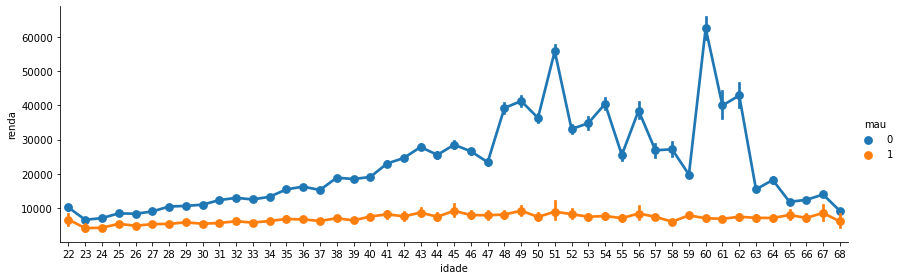

In [ ]:
sns.catplot(data=df, x='idade', y='renda', hue='mau', kind='point', height=4, aspect=3)

In [ ]:
# Mostrar relação com cruzamento entre duas variáveis ('posse_de_imovel' e 'mau')
pd.crosstab(df.posse_de_imovel, df.mau, normalize = 'index')

mau,0,1
posse_de_imovel,,
N,0.949839,0.050161
S,0.958532,0.041468


In [ ]:
# Mostrar relação com cruzamento entre duas variáveis ('posse_de_veiculo' e 'mau')
pd.crosstab(df.posse_de_veiculo, df.mau, normalize = 'index')

mau,0,1
posse_de_veiculo,,
N,0.955124,0.044876
S,0.956545,0.043455


In [ ]:
# Mostrar relação com cruzamento entre duas variáveis ('tipo_renda' e 'mau')
pd.crosstab(df.tipo_renda, df.mau, normalize = 'index')

mau,0,1
tipo_renda,,
Assalariado,0.953917,0.046083
Bolsista,0.977839,0.022161
Empresário,0.956297,0.043703
Pensionista,0.953748,0.046252
Servidor público,0.968116,0.031884


In [ ]:
# Transformar a variável resposta em inteiro
    # df['mau'] = df.mau.astype('int64')
    # df['mau']

## 4. Desenvolvimento do scorecard

### 4.1 Análise exploratória

### 4.2 Desenvolvimento do modelo

In [ ]:
# Visualização da quantidade de linhas e colunas
df.shape

(750000, 15)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Número de linhas com valores NaN
df.isnull().sum().sum()

125957

In [ ]:
# Número de linhas com valores NaN
df.isna().sum()

data_ref                      0
id_cliente                    0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
# Remoção de linhas com valores NaN
df.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
# Substuição de valores NaN por 0
# df['tempo_emprego'].fillna(0, inplace=True)

In [ ]:
# Visualização da quantidade de linhas e colunas após remoção
df.shape

(624043, 15)

In [ ]:
# Número novo de linhas com valores NaN
df.isna().sum().sum()

0

In [ ]:
# Definir um objeto X somente com as variáveis explicativas
X = df.drop(columns = ['mau', 'id_cliente', 'data_ref'])

# Definir um objeto y somente com a variável resposta
y = df['mau']

In [ ]:
X.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [ ]:
# Transformar as variáveis qualitativas em numéricas (dummies)
X = pd.get_dummies(X, drop_first = True)
X

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,43,6.873973,1.0,2515.39,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,35,4.526027,2.0,3180.19,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,31,0.243836,4.0,1582.29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,54,12.772603,2.0,13721.17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,31,8.432877,1.0,2891.08,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749993,0,51,13.298630,2.0,15315.94,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
749995,0,48,3.038356,2.0,2109.99,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
749997,2,43,10.375342,4.0,649.06,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
749998,0,56,13.780822,1.0,4216.72,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         1
         ..
749993    0
749995    0
749997    1
749998    0
749999    0
Name: mau, Length: 624043, dtype: int64

In [ ]:
# Dividir os objetos X e y em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# Checando os objetos

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(468032, 25)
(156011, 25)
(468032,)
(156011,)


In [ ]:
# Importando a árvore de classificação
clf = DecisionTreeClassifier(random_state = 420710, min_samples_leaf=1, max_depth=5)
clf

DecisionTreeClassifier(max_depth=5, random_state=420710)

In [ ]:
# Treino do modelo com a base de treino
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=420710)

In [ ]:
# Avaliação das classificações na base de treino
prev_treino = clf.predict(X_train)

pd.crosstab(prev_treino, y_train)

mau,0,1
row_0,,
0,447543,20486
1,1,2


In [ ]:
# Avaliação das classificações na base de treino em porcentagem
prev_treino = clf.predict(X_train)

pd.crosstab(prev_treino, y_train, normalize = 'index')

mau,0,1
row_0,,
0,0.956229,0.043771
1,0.333333,0.666667


In [ ]:
# AVALIAÇÃO DAS CLASSIFICAÇÕES NA BASE DE TESTE!
prev_treino = clf.predict(X_test)

pd.crosstab(prev_treino, y_test)

mau,0,1
row_0,,
0,149073,6936
1,2,0


In [ ]:
# AVALIAÇÃO DAS CLASSIFICAÇÕES NA BASE DE TESTE!
prev_treino = clf.predict(X_test)

pd.crosstab(prev_treino, y_test, normalize = 'index')

mau,0,1
row_0,,
0,0.955541,0.044459
1,1.000000,0.000000


In [ ]:
# Calcular AUC (train)
proba_train = clf.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, proba_train)
metrics.auc(fpr, tpr)

0.7108747143824181

In [ ]:
# Calcular AUC (test)
proba_test = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba_test)
metrics.auc(fpr, tpr)

0.7093142777230057

# Projeto

### 4.3 Fazendo o *tunning* do modelo

In [ ]:
# Definição do grid
grid_parametros = {'max_depth': [2, 5, 10, 20], 'min_samples_leaf': [1, 20, 200]}
grid_parametros

{'max_depth': [2, 5, 10, 20], 'min_samples_leaf': [1, 20, 200]}

In [ ]:
# Importando um objeto da classe GridSearchCV
grid = GridSearchCV(estimator = clf, param_grid = grid_parametros, cv = 15, verbose = 0)

# Treinando todos os modelos do GridSearch, com a metodologia de cross validation indicada
grid.fit(X_train, y_train)

GridSearchCV(cv=15,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=420710),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 20, 200]})

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.682152,0.091800,0.012333,0.003756,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.956222,0.956222,0.956253,...,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956225,0.000011,1
1,0.794979,0.092776,0.014303,0.005126,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.956222,0.956222,0.956253,...,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956225,0.000011,1
2,0.884099,0.069682,0.015431,0.004798,2,200,"{'max_depth': 2, 'min_samples_leaf': 200}",0.956222,0.956222,0.956253,...,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956225,0.000011,1
3,1.990125,0.100605,0.015969,0.004584,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",0.956222,0.956222,0.956253,...,0.956093,0.956221,0.956221,0.956189,0.956221,0.956221,0.956221,0.956185,0.000064,8
4,1.858023,0.178223,0.016235,0.003866,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.956222,0.956222,0.956253,...,0.956093,0.956221,0.956221,0.956189,0.956221,0.956221,0.956221,0.956193,0.000057,7
5,1.569545,0.057751,0.013723,0.004488,5,200,"{'max_depth': 5, 'min_samples_leaf': 200}",0.956222,0.956222,0.956253,...,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956225,0.000011,1
6,3.024104,0.258650,0.015350,0.006157,10,1,"{'max_depth': 10, 'min_samples_leaf': 1}",0.956030,0.956030,0.955900,...,0.955932,0.955868,0.955932,0.955804,0.956028,0.956028,0.955996,0.955913,0.000089,11
7,3.567218,0.056480,0.021133,0.004441,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",0.956350,0.956222,0.956285,...,0.956028,0.956285,0.956285,0.956125,0.956093,0.956189,0.955996,0.956148,0.000113,9
8,3.642876,0.162567,0.023339,0.004799,10,200,"{'max_depth': 10, 'min_samples_leaf': 200}",0.956222,0.956222,0.956253,...,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956221,0.956225,0.000011,1
9,6.165775,0.422587,0.028063,0.003589,20,1,"{'max_depth': 20, 'min_samples_leaf': 1}",0.953210,0.952857,0.953144,...,0.953080,0.953593,0.953112,0.953176,0.952086,0.951926,0.952824,0.952779,0.000445,12


In [ ]:
grid.best_score_

0.9562252153829538

In [ ]:
grid.best_index_

0

In [ ]:
# Definindo um objeto da classe da RandomForest
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Método para 'treinar' o modelo
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.predict(X_test)

array([0.01283333, 0.        , 0.        , ..., 0.02733333, 0.11600673,
       0.        ])

In [ ]:
# Cálculo AUC (test)
proba_test = rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba_test)
metrics.auc(fpr, tpr)

0.6044949347388481